## Model creation using XGBoost

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [6]:
# Reding USD to JPY data from yahoo finance, date 2012-01-01 to 2022-12-31

data= yf.download("USDJPY=X", start="2012-01-01", end="2022-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,77.050003,77.089996,76.870003,77.019997,77.019997,0
2012-01-03,76.933998,76.954002,76.653000,76.930000,76.930000,0
2012-01-04,76.732002,76.814003,76.599998,76.722000,76.722000,0
2012-01-05,76.710999,77.129997,76.669998,76.709999,76.709999,0
2012-01-06,77.158997,77.308998,77.015999,77.151001,77.151001,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2012-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2866 non-null   float64
 1   High       2866 non-null   float64
 2   Low        2866 non-null   float64
 3   Close      2866 non-null   float64
 4   Adj Close  2866 non-null   float64
 5   Volume     2866 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 156.7 KB


In [20]:
# Adding Day and Month columns

data['Day'] = data.index.dayofweek
data['Month'] = data.index.month
data.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month
Date,,,,,,,,
2012-01-02,77.050003,77.089996,76.870003,77.019997,77.019997,0,0,1
2012-01-03,76.933998,76.954002,76.653000,76.930000,76.930000,0,1,1
2012-01-04,76.732002,76.814003,76.599998,76.722000,76.722000,0,2,1
2012-01-05,76.710999,77.129997,76.669998,76.709999,76.709999,0,3,1
2012-01-06,77.158997,77.308998,77.015999,77.151001,77.151001,0,4,1


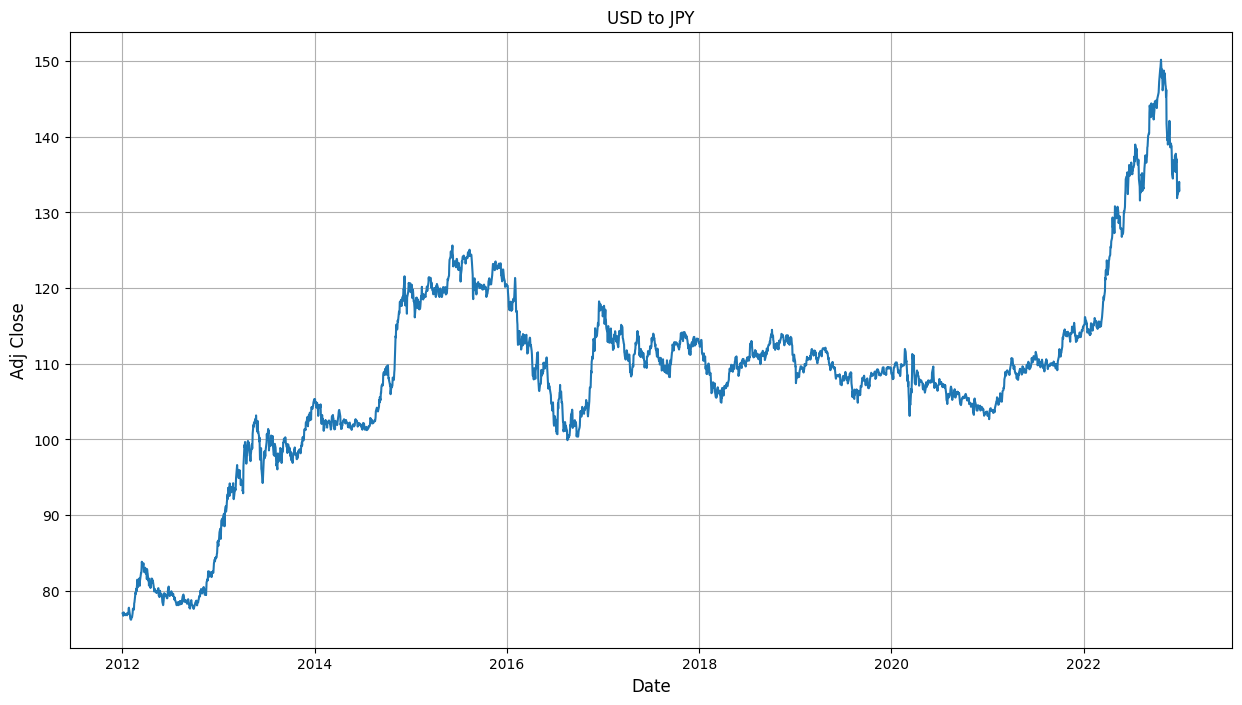

In [16]:
# Plotting the Adj Close price according to data

plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('USD to JPY')
plt.plot(data['Adj Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

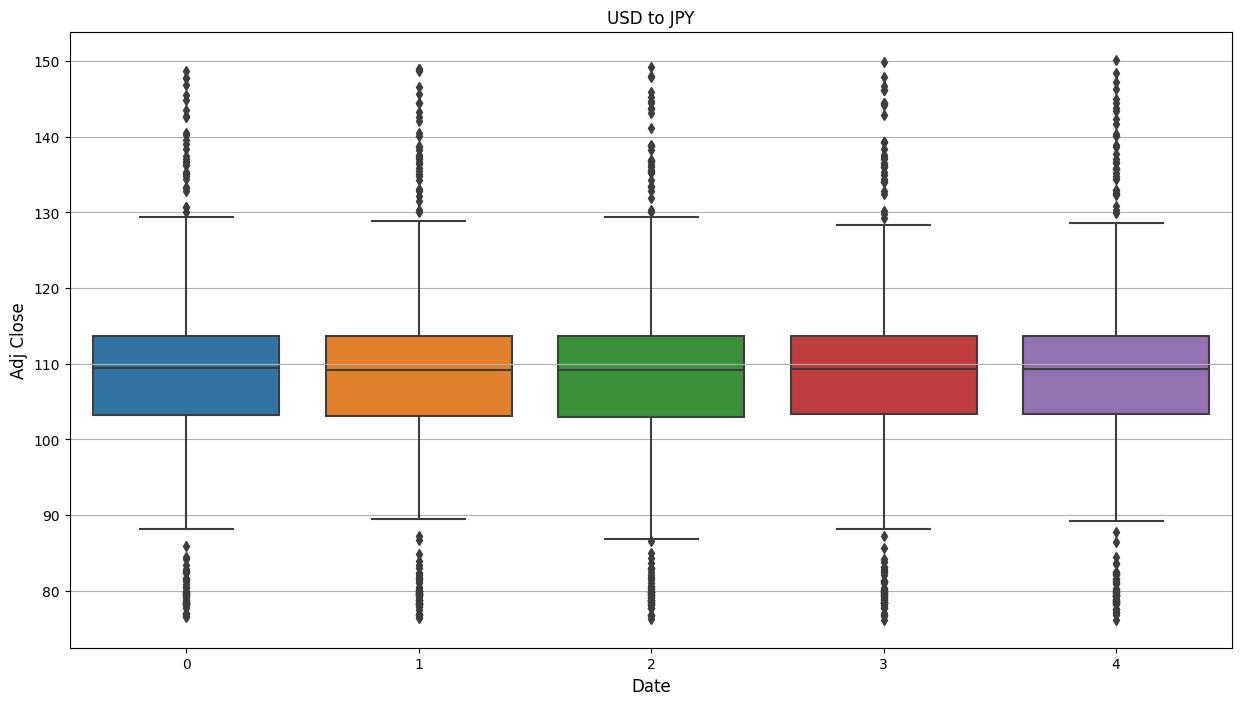

In [21]:
# Plotting Adj Close price against Day

plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('USD to JPY')
sns.boxplot(x=data['Day'], y=data['Adj Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

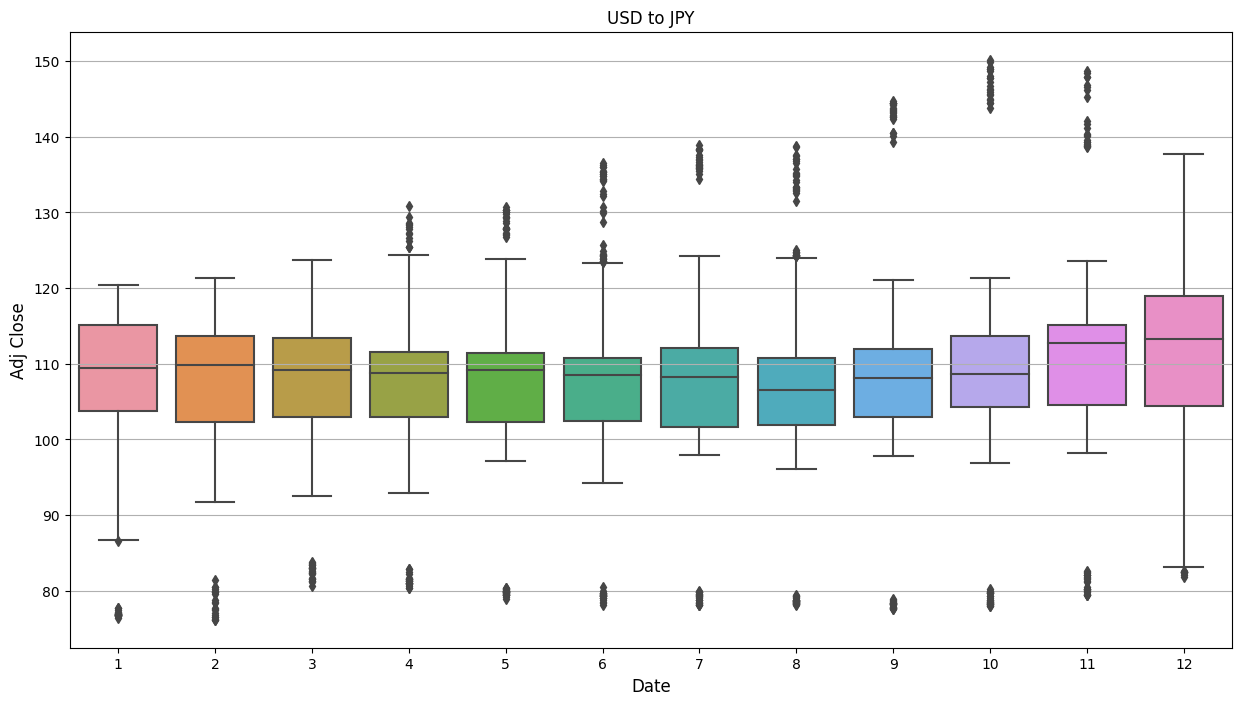

In [22]:
# Plotting Adj Close price against Month

plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('USD to JPY')
sns.boxplot(x=data['Month'], y=data['Adj Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

## Train and Test Data

In [23]:
# Features and Target

X = data.drop('Adj Close', axis=1)
y = data['Adj Close']

print(X.shape, y.shape)

(2866, 7) (2866,)


In [24]:
# Splitting Train and Test
X_train = X.loc[X.index<'2021-01-01']
X_test = X.loc[X.index>='2021-01-01']

y_train = y.loc[X.index<'2021-01-01']
y_test = y.loc[X.index>='2021-01-01']

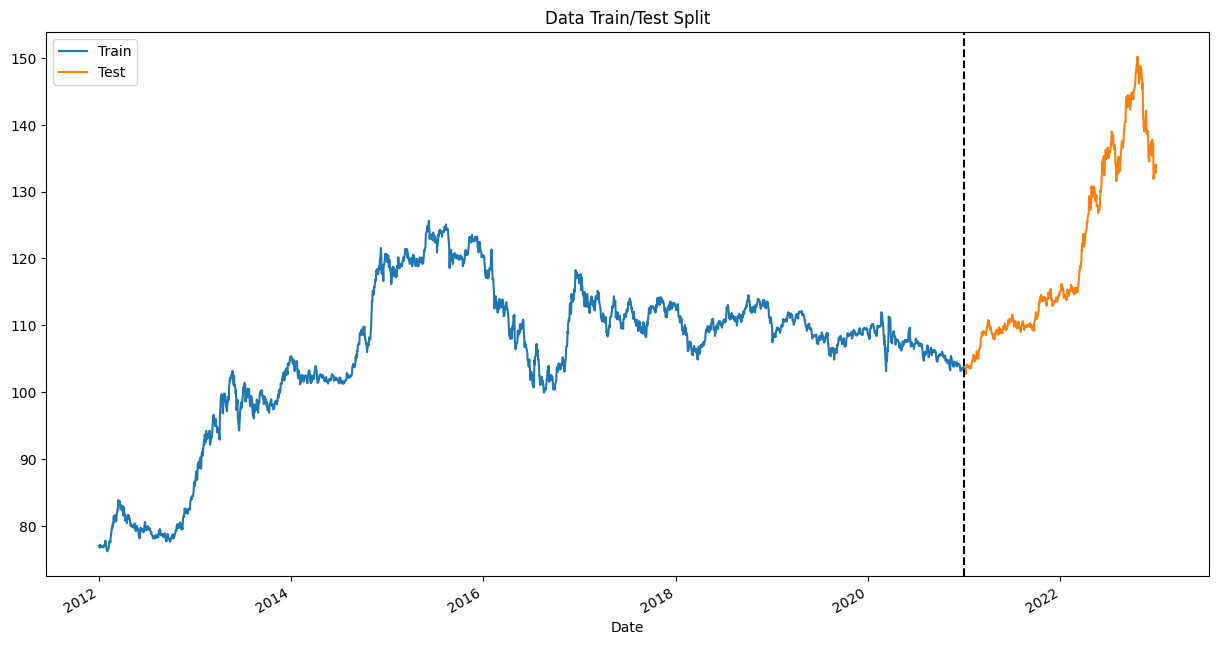

In [27]:
# Visualizing train and test data

fig, ax = plt.subplots(figsize=(15,8))
y_train.plot(ax=ax, label='Train Data', title='Data Train/Test Split')
y_test.plot(ax=ax, label='Test Data')
ax.axvline('2021-01-01', color='black', ls='--')
ax.legend(['Train', 'Test'])
plt.show()

## Model Creation

In [29]:
# Importing libraries

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [33]:
# Model 1: XGBoost Regressor
reg = xgb.XGBRegressor(n_estimators =1000,  early_stopping_rounds=5,learning_rate = 0.01)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:104.76609	validation_1-rmse:119.74059
[100]	validation_0-rmse:38.45408	validation_1-rmse:48.68682
[200]	validation_0-rmse:14.12120	validation_1-rmse:22.66760
[300]	validation_0-rmse:5.18804	validation_1-rmse:13.42965
[400]	validation_0-rmse:1.90742	validation_1-rmse:10.25726
[500]	validation_0-rmse:0.70234	validation_1-rmse:9.09055
[600]	validation_0-rmse:0.25967	validation_1-rmse:8.56548
[700]	validation_0-rmse:0.09737	validation_1-rmse:8.27003
[800]	validation_0-rmse:0.03869	validation_1-rmse:8.08707
[900]	validation_0-rmse:0.01883	validation_1-rmse:7.97021
[999]	validation_0-rmse:0.01323	validation_1-rmse:7.90024


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Feature Importance

In [39]:
# Feature importance

feature_imp = pd.DataFrame(reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance']).sort_values('importance', ascending=False)

feature_imp

,importance
Open,8.431191e-01
Close,1.533889e-01
High,2.829738e-03
Low,6.620201e-04
Month,1.100953e-07
Day,7.378348e-08
Volume,0.000000e+00


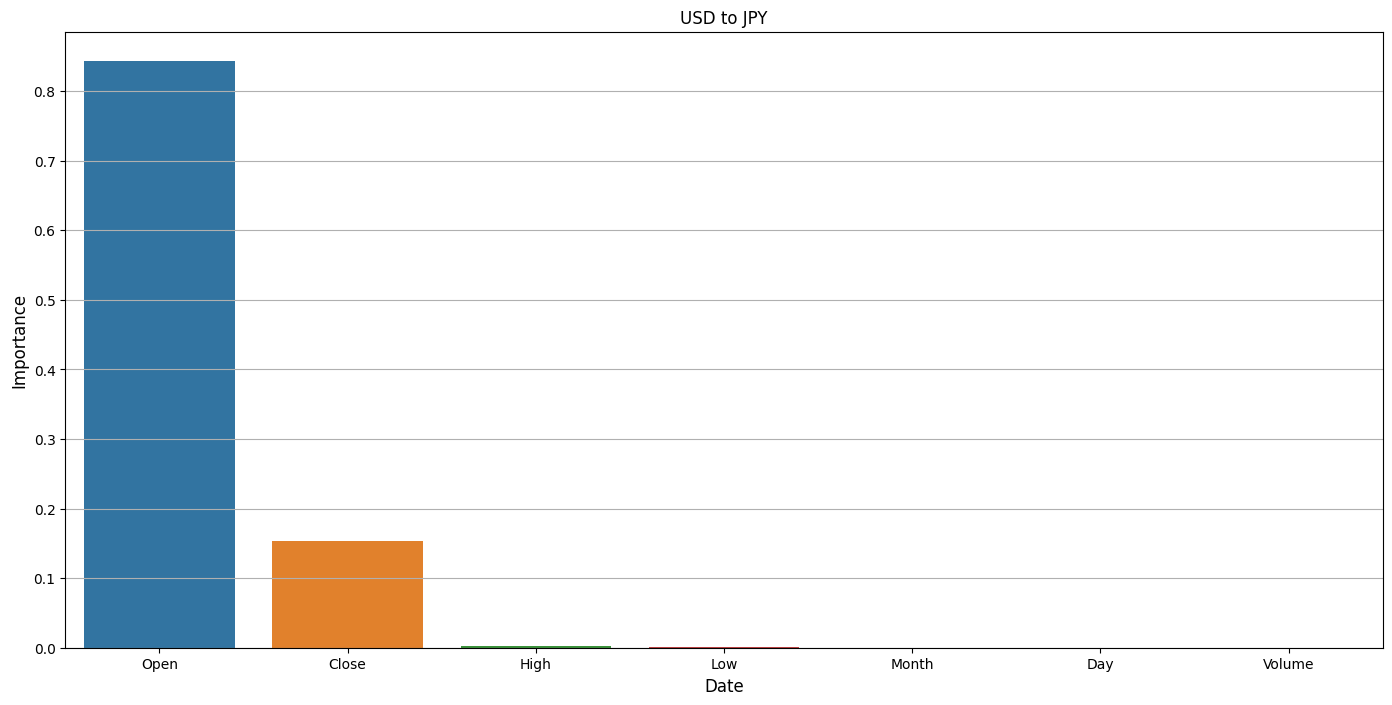

In [42]:
# Plotting Feature importance

plt.figure(figsize=(17,8))
plt.grid(True)
plt.title('USD to JPY')
sns.barplot(x=feature_imp.index, y=feature_imp['importance'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

## Forecast on Test

In [44]:
# Forecast on test data

X_test['prediction'] = reg.predict(X_test)
X_test

/tmp/ipykernel_110073/3159866994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['prediction'] = reg.predict(X_test)


,Open,High,Low,Close,Volume,Day,Month,prediction
Date,,,,,,,,
2021-01-01,103.225998,103.250000,103.225998,103.225998,0,4,1,103.227509
2021-01-04,103.244003,103.244003,102.709999,103.238998,0,0,1,103.247032
2021-01-05,103.141998,103.180000,102.671997,103.125000,0,1,1,103.122467
2021-01-06,102.699997,103.431000,102.589996,102.678001,0,2,1,102.693039
2021-01-07,103.028000,103.950996,102.956001,103.024002,0,3,1,103.045326
...,...,...,...,...,...,...,...,...
2022-12-26,132.770004,133.237000,132.330002,132.789993,0,0,12,125.423378
2022-12-27,132.764008,133.587006,132.647995,132.764008,0,1,12,125.423378
2022-12-28,133.485992,134.395004,133.410995,133.485992,0,2,12,125.423378


In [49]:
# Merging Data
df = data.merge(X_test[['prediction']], how='left', left_index=True, right_index=True)

In [48]:
data

,Open,High,Low,Close,Adj Close,Volume,Day,Month
Date,,,,,,,,
2012-01-02,77.050003,77.089996,76.870003,77.019997,77.019997,0,0,1
2012-01-03,76.933998,76.954002,76.653000,76.930000,76.930000,0,1,1
2012-01-04,76.732002,76.814003,76.599998,76.722000,76.722000,0,2,1
2012-01-05,76.710999,77.129997,76.669998,76.709999,76.709999,0,3,1
2012-01-06,77.158997,77.308998,77.015999,77.151001,77.151001,0,4,1
...,...,...,...,...,...,...,...,...
2022-12-26,132.770004,133.237000,132.330002,132.789993,132.789993,0,0,12
2022-12-27,132.764008,133.587006,132.647995,132.764008,132.764008,0,1,12
2022-12-28,133.485992,134.395004,133.410995,133.485992,133.485992,0,2,12


Text(0.5, 1.0, 'USD to JPY')

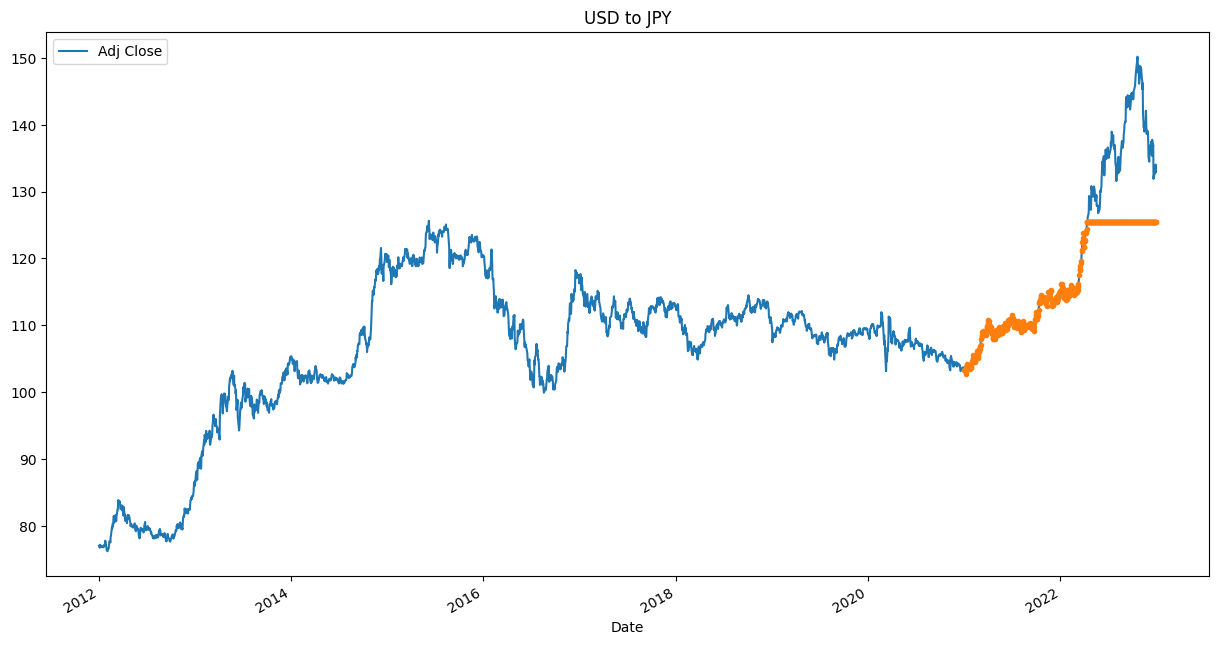

In [50]:
# Plotting prediction and data

ax= data[['Adj Close']].plot(figsize=(15,8))
df['prediction'].plot(ax=ax, style='.')
ax.set_title('USD to JPY')

In [53]:
score = np.sqrt(mean_squared_error(y_test, X_test['prediction']))
print( 'RMSE Score on test data: {}'.format(score))

RMSE Score on test data: 7.900242122713841


## Calculated Error

In [56]:
# Calculate Error

X_test['error'] = np.abs(y_test - X_test['prediction'])

/tmp/ipykernel_110073/1793114486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['error'] = np.abs(y_test - X_test['prediction'])


In [58]:
X_test['date']= X_test.index

X_test.groupby('date')['error'].mean().sort_values(ascending=False).head(10)

/tmp/ipykernel_110073/2139364890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['date']= X_test.index


date
2022-10-21    24.752617
2022-10-20    24.397621
2022-10-19    23.785622
2022-10-18    23.547615
2022-10-25    23.463615
2022-11-01    23.313622
2022-10-17    23.208626
2022-11-04    22.969627
2022-10-26    22.556618
2022-11-02    22.491615
Name: error, dtype: float64